In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("aerofit_treadmill.csv")

In [ ]:
data.head(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
data.shape

(180, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


In [ ]:
data.describe(include= "object").T

,count,unique,top,freq
Product,180,3,KP281,80
Gender,180,2,Male,104
MaritalStatus,180,2,Partnered,107


In [ ]:
#nunber of unique products
data["Product"].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

In [ ]:
#number of records per product
print("Number of records available for K281: ",data[data["Product"] == "KP281"].shape[0])
print("Number of records available for K481: ",data[data["Product"] == "KP481"].shape[0])
print("Number of records available for K781: ",data[data["Product"] == "KP781"].shape[0])

Number of records available for K281:  80
Number of records available for K481:  60
Number of records available for K781:  40


In [ ]:
print("Probability of user buying K281:", round(80/180,3))
print("Probability of user buying K481:", round(60/180,3))
print("Probability of user buying K781:", round(40/180,3))

Probability of user buying K281: 0.444
Probability of user buying K481: 0.333
Probability of user buying K781: 0.222


In [ ]:
pd.crosstab(data["Gender"], data["Product"], normalize = True)

Product,KP281,KP481,KP781
Gender,,,
Female,0.222222,0.161111,0.038889
Male,0.222222,0.172222,0.183333


In [ ]:
pd.crosstab(data["MaritalStatus"], data["Product"], normalize = True)

Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,0.266667,0.200000,0.127778
Single,0.177778,0.133333,0.094444


Outlier Analysis

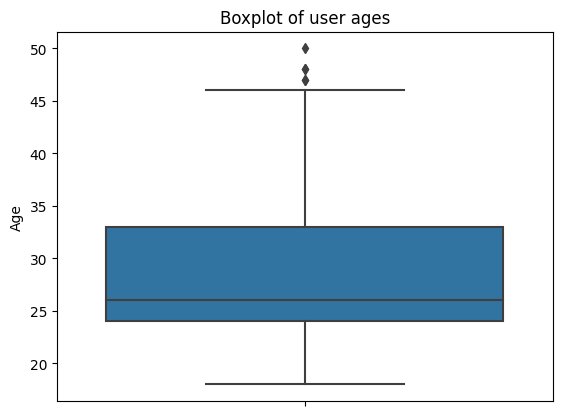

In [ ]:
sns.boxplot(data, y = "Age")
plt.title("Boxplot of user ages")
plt.show()

In [ ]:
data[data["Age"]>47]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
79,KP281,50,Female,16,Partnered,3,3,64809,66
139,KP481,48,Male,16,Partnered,2,3,57987,64
179,KP781,48,Male,18,Partnered,4,5,95508,180


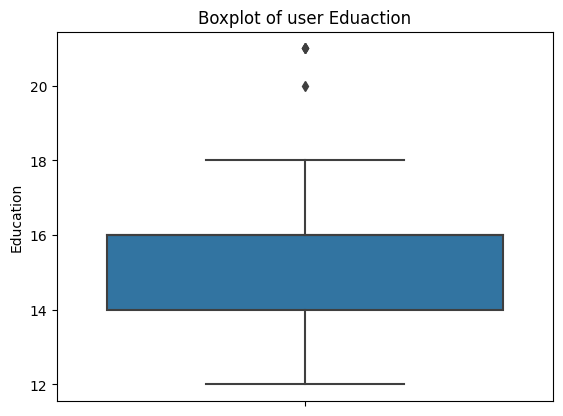

In [ ]:
sns.boxplot(data, y = "Education")
plt.title("Boxplot of user Eduaction")
plt.show()

In [ ]:
data[data["Education"]>18]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
156,KP781,25,Male,20,Partnered,4,5,74701,170
157,KP781,26,Female,21,Single,4,3,69721,100
161,KP781,27,Male,21,Partnered,4,4,90886,100
175,KP781,40,Male,21,Single,6,5,83416,200


People with 18+ years of education perfer the KP781

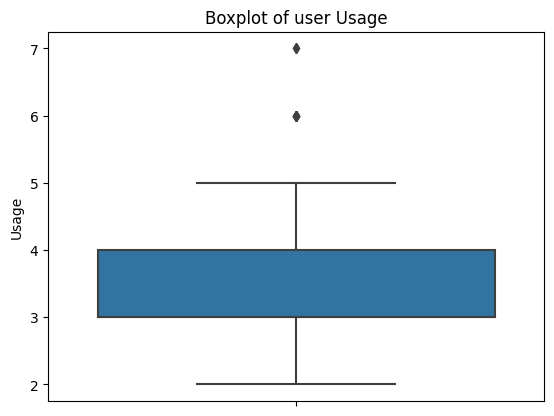

In [ ]:
sns.boxplot(data, y = "Usage")
plt.title("Boxplot of user Usage")
plt.show()

In [ ]:
data[data["Usage"]>5]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
154,KP781,25,Male,18,Partnered,6,4,70966,180
155,KP781,25,Male,18,Partnered,6,5,75946,240
162,KP781,28,Female,18,Partnered,6,5,92131,180
163,KP781,28,Male,18,Partnered,7,5,77191,180
164,KP781,28,Male,18,Single,6,5,88396,150
166,KP781,29,Male,14,Partnered,7,5,85906,300
167,KP781,30,Female,16,Partnered,6,5,90886,280
170,KP781,31,Male,16,Partnered,6,5,89641,260
175,KP781,40,Male,21,Single,6,5,83416,200


People with usage greater than 5 also prefer KP781

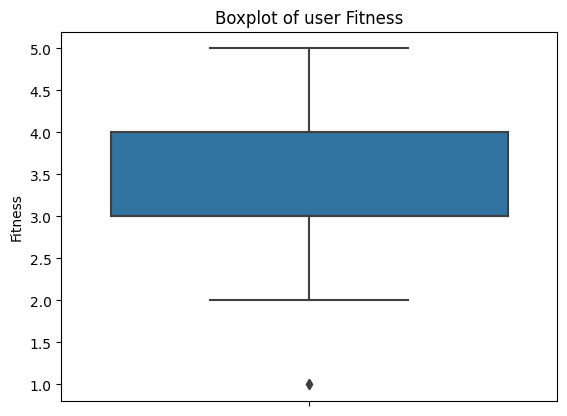

In [ ]:
sns.boxplot(data, y = "Fitness")
plt.title("Boxplot of user Fitness")
plt.show()

In [ ]:
data[data["Fitness"]<=1.5]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
14,KP281,23,Male,16,Partnered,3,1,38658,47
117,KP481,31,Female,18,Single,2,1,65220,21


People with low levels of fitness perfer KP281 and KP481

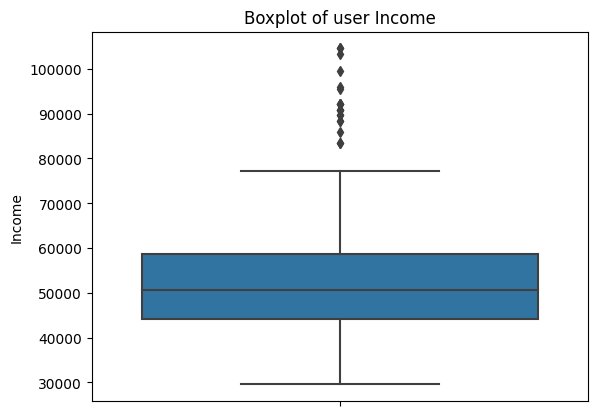

In [ ]:
sns.boxplot(data, y = "Income")
plt.title("Boxplot of user Income")
plt.show()

In [ ]:
data[data["Income"]>80000]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
159,KP781,27,Male,16,Partnered,4,5,83416,160
160,KP781,27,Male,18,Single,4,3,88396,100
161,KP781,27,Male,21,Partnered,4,4,90886,100
162,KP781,28,Female,18,Partnered,6,5,92131,180
164,KP781,28,Male,18,Single,6,5,88396,150
166,KP781,29,Male,14,Partnered,7,5,85906,300
167,KP781,30,Female,16,Partnered,6,5,90886,280
168,KP781,30,Male,18,Partnered,5,4,103336,160
169,KP781,30,Male,18,Partnered,5,5,99601,150
170,KP781,31,Male,16,Partnered,6,5,89641,260


Peope with high incomes(>80000) perfer KP781

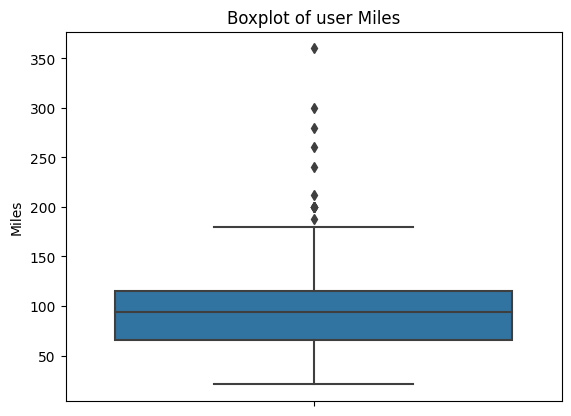

In [ ]:
sns.boxplot(data, y = "Miles")
plt.title("Boxplot of user Miles")
plt.show()

In [ ]:
data[data["Miles"]>200]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
84,KP481,21,Female,14,Partnered,5,4,34110,212
155,KP781,25,Male,18,Partnered,6,5,75946,240
166,KP781,29,Male,14,Partnered,7,5,85906,300
167,KP781,30,Female,16,Partnered,6,5,90886,280
170,KP781,31,Male,16,Partnered,6,5,89641,260
173,KP781,35,Male,16,Partnered,4,5,92131,360


Poeple who train with intensity also mostly perfer KP781

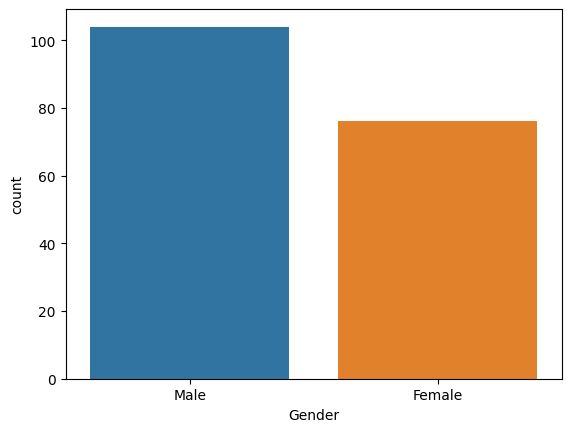

In [ ]:
#number of males and females in the dataset
sns.countplot(data = data, x = "Gender")
plt.show()

In [ ]:
data["Gender"].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

<Axes: xlabel='MaritalStatus', ylabel='count'>

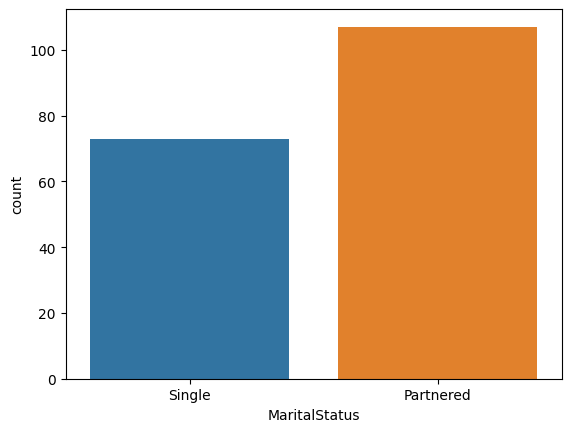

In [ ]:
#number of partnered and singles in the dataset
sns.countplot(data = data, x = "MaritalStatus")

In [ ]:
data["MaritalStatus"].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [ ]:
#median age group of customer per product type
data.groupby("Product")["Age"].agg(lambda x: x.median())

Product
KP281    26.0
KP481    26.0
KP781    27.0
Name: Age, dtype: float64

In [ ]:
#mean age group of customer per product type
data.groupby("Product")["Age"].agg(lambda x: x.mean())

Product
KP281    28.55
KP481    28.90
KP781    29.10
Name: Age, dtype: float64

In [ ]:
#median usage group of customer per product type
data.groupby("Product")["Usage"].agg(lambda x: x.median())

Product
KP281    3.0
KP481    3.0
KP781    5.0
Name: Usage, dtype: float64

In [ ]:
#mean usage group of customer per product type
data.groupby("Product")["Usage"].agg(lambda x: x.mean())

Product
KP281    3.087500
KP481    3.066667
KP781    4.775000
Name: Usage, dtype: float64

In [ ]:
#median eduaction group of customer per product type
data.groupby("Product")["Education"].agg(lambda x: x.median())

Product
KP281    16.0
KP481    16.0
KP781    18.0
Name: Education, dtype: float64

In [ ]:
#mean eduaction group of customer per product type
data.groupby("Product")["Education"].agg(lambda x: x.mean())

Product
KP281    15.037500
KP481    15.116667
KP781    17.325000
Name: Education, dtype: float64

In [ ]:
#mode martial status group of customer per product type
data.groupby("Product")["MaritalStatus"].agg(lambda x: x.mode())

Product
KP281    Partnered
KP481    Partnered
KP781    Partnered
Name: MaritalStatus, dtype: object

In [ ]:
#mode gender group of customer per product type
data.groupby("Product")["Gender"].agg(lambda x: x.mode())

Product
KP281    [Female, Male]
KP481              Male
KP781              Male
Name: Gender, dtype: object

In [ ]:
#median fitness level group of customer per product type
data.groupby("Product")["Fitness"].agg(lambda x: x.median())

Product
KP281    3.0
KP481    3.0
KP781    5.0
Name: Fitness, dtype: float64

In [ ]:
#mean fitness level group of customer per product type
data.groupby("Product")["Fitness"].agg(lambda x: x.mean())

Product
KP281    2.9625
KP481    2.9000
KP781    4.6250
Name: Fitness, dtype: float64

In [ ]:
#median income group of customers per product type
data.groupby("Product")["Income"].agg(lambda x: x.median())

Product
KP281    46617.0
KP481    49459.5
KP781    76568.5
Name: Income, dtype: float64

In [ ]:
#mean income group of customers per product type
data.groupby("Product")["Income"].agg(lambda x: x. mean())

Product
KP281    46418.025
KP481    48973.650
KP781    75441.575
Name: Income, dtype: float64

In [ ]:
#median miles per group of customers per product type
data.groupby("Product")["Miles"].agg(lambda x: x.median())

Product
KP281     85.0
KP481     85.0
KP781    160.0
Name: Miles, dtype: float64

In [ ]:
#mean miles per group of customers per product type
data.groupby("Product")["Miles"].agg(lambda x: x.mean())

Product
KP281     82.787500
KP481     87.933333
KP781    166.900000
Name: Miles, dtype: float64

<Axes: xlabel='Age', ylabel='Fitness'>

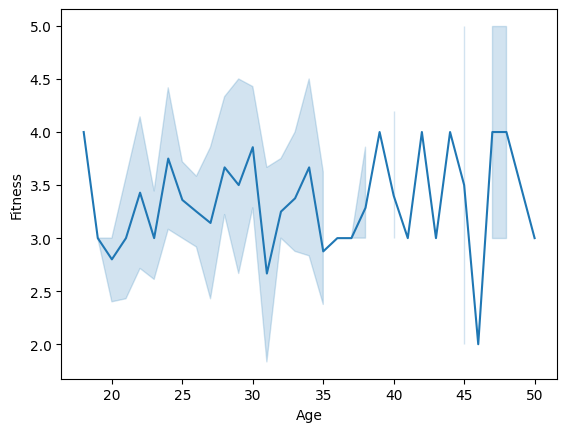

In [ ]:
#age of the customers vs fitness level in the dataset
sns.lineplot(data = data, x = "Age", y = "Fitness")

<Axes: xlabel='Age', ylabel='Usage'>

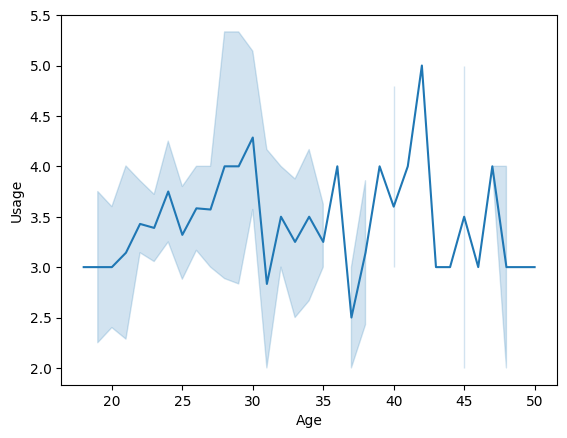

In [ ]:
#age of the customers vs usage level in the dataset
sns.lineplot(data = data, x = "Age", y = "Usage")

<Axes: xlabel='Age', ylabel='Income'>

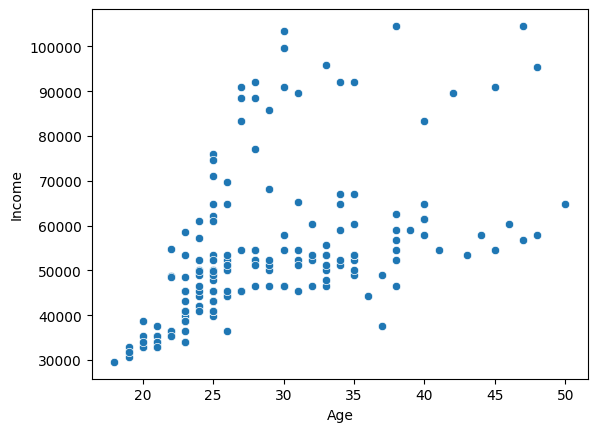

In [ ]:
#age of the customers vs Income level in the dataset
sns.scatterplot(data = data, x = "Age", y = "Income")

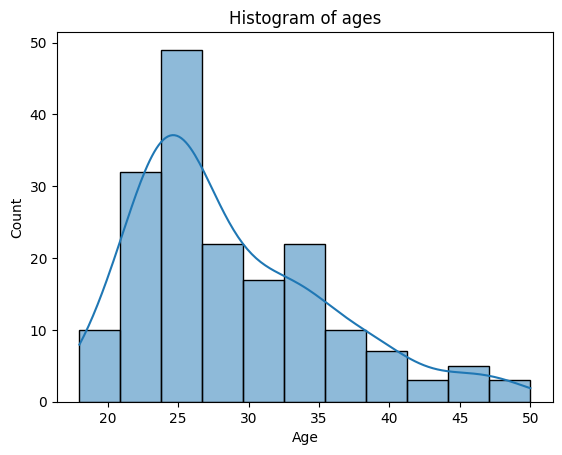

In [ ]:
sns.histplot(data, x = "Age", kde= True)
plt.title("Histogram of ages")
plt.show()

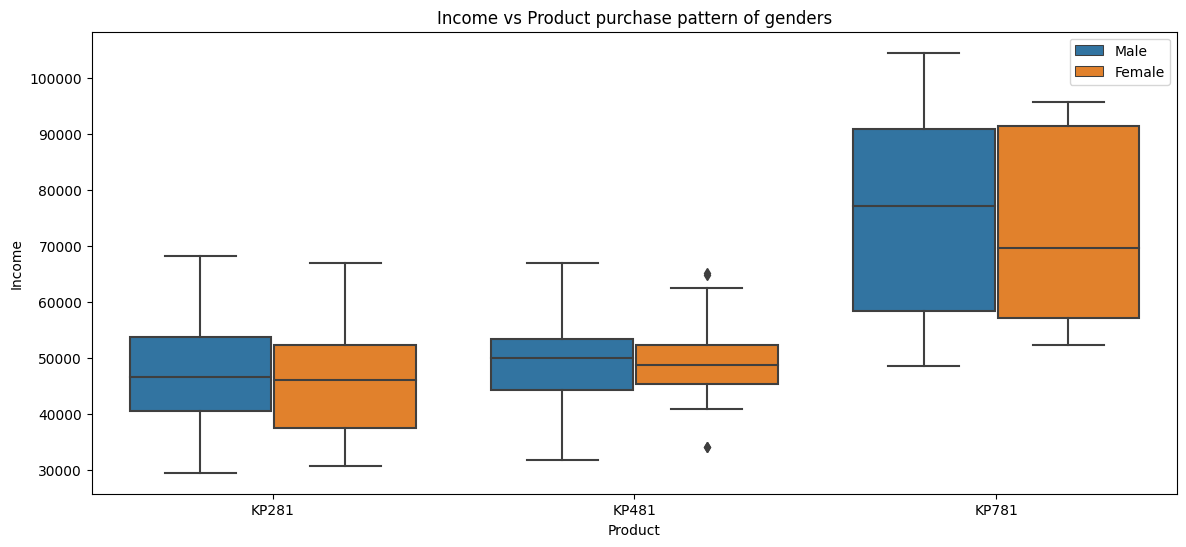

In [ ]:
plt.figure(figsize= (14,6))
sns.boxplot(data, y = "Income",x = "Product", hue = "Gender")
plt.title("Income vs Product purchase pattern of genders")
plt.legend(loc = "upper right")
plt.show()

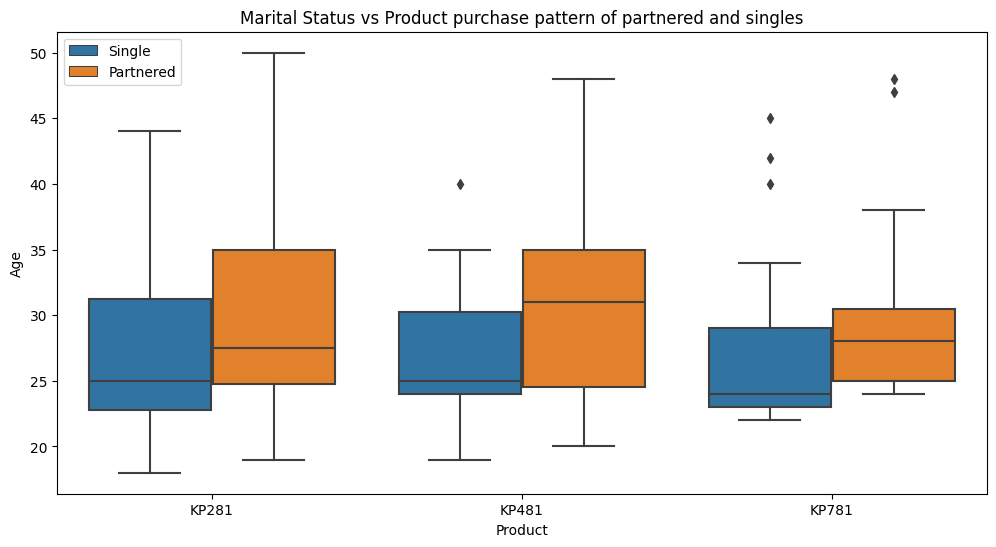

In [ ]:
plt.figure(figsize= (12,6))
sns.boxplot(data, y = "Age",x = "Product", hue = "MaritalStatus")
plt.title("Marital Status vs Product purchase pattern of partnered and singles")
plt.legend(loc = "upper left")
plt.show()

In [ ]:
'''
Product KP281 level analysis

'''

'\nProduct KP281 level analysis\n\n'

In [ ]:
df_1 = data[data["Product"] == "KP281"]

In [ ]:
df_1.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
df_1["Gender"].value_counts()

Male      40
Female    40
Name: Gender, dtype: int64

In [ ]:
print("Probability of being and male :", 40/80)

Probability of being and male : 0.5


In [ ]:
df_1["Age"].mean()

28.55

In [ ]:
df_1["Income"].mean()

46418.025

In [ ]:
df_1["Fitness"].mean()

2.9625

In [ ]:
df_1["Usage"].mean()

3.0875

In [ ]:
df_1["Miles"].mean()

82.7875

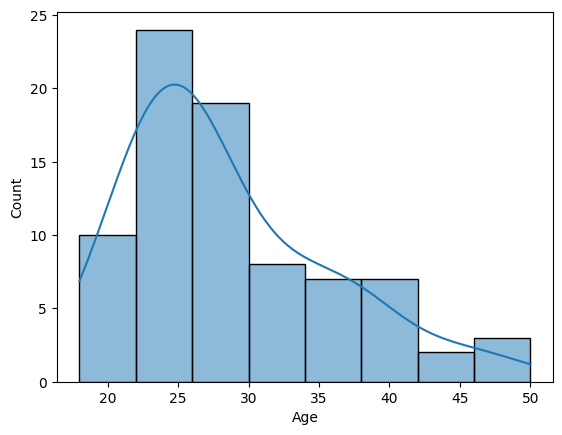

In [ ]:
sns.histplot(df_1, x = "Age", kde = True)
plt.show()

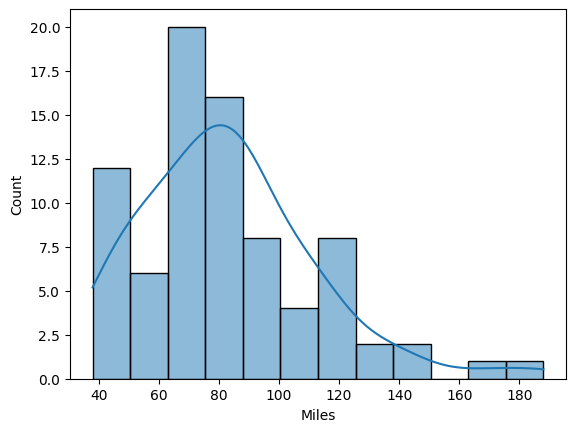

In [ ]:
sns.histplot(df_1, x = "Miles", kde = True)
plt.show()

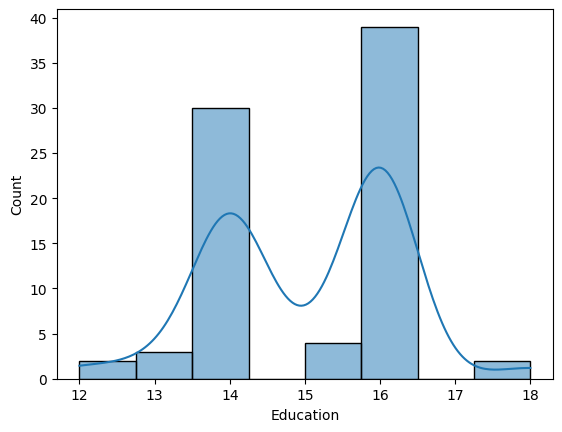

In [ ]:
sns.histplot(df_1, x = "Education", kde = True)
plt.show()

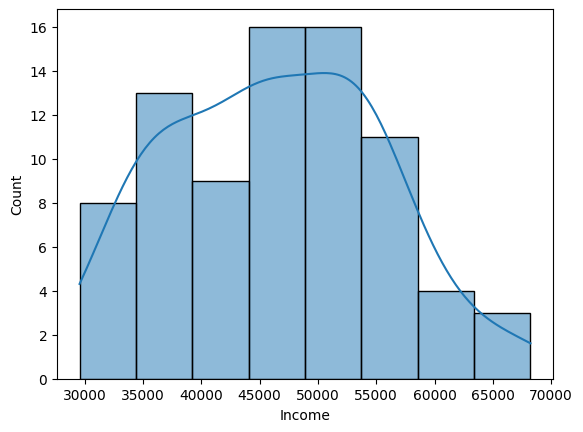

In [ ]:
sns.histplot(df_1, x = "Income", kde = True)
plt.show()

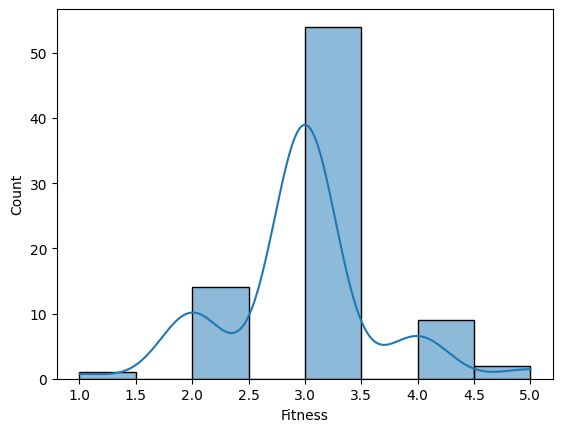

In [ ]:
sns.histplot(df_1, x = "Fitness", kde = True)
plt.show()

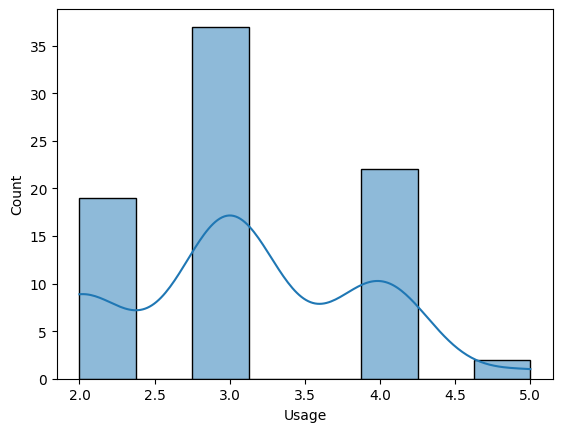

In [ ]:
sns.histplot(df_1, x = "Usage", kde = True)
plt.show()

In [ ]:
Usage_fitness = pd.crosstab(df_1["Fitness"], df_1["Usage"], margins = True)
Usage_fitness

Usage,2,3,4,5,All
Fitness,,,,,
1,0,1,0,0,1
2,9,4,1,0,14
3,10,27,17,0,54
4,0,5,3,1,9
5,0,0,1,1,2
All,19,37,22,2,80


In [ ]:
Usage_fitness_1 = pd.crosstab(df_1["Fitness"], df_1["Usage"])

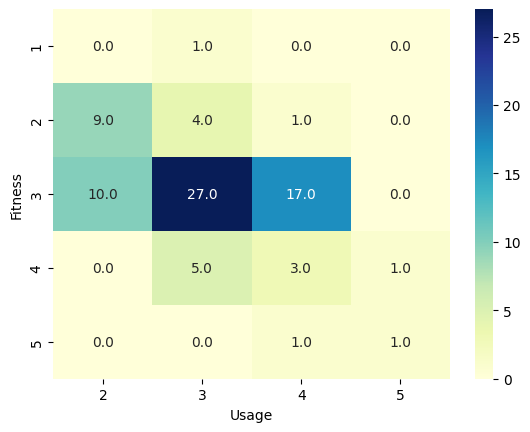

In [ ]:
sns.heatmap(Usage_fitness_1, annot=True, cmap='YlGnBu', fmt=".1f")
plt.show()

In [ ]:
Usage_fitness

Usage,2,3,4,5,All
Fitness,,,,,
1,0,1,0,0,1
2,9,4,1,0,14
3,10,27,17,0,54
4,0,5,3,1,9
5,0,0,1,1,2
All,19,37,22,2,80


probability of user belonging to fitness level 3 is the highest  = 0.675

In [ ]:
print("Probability of user beloinging to fitness level 1: ", 1/80)
print("Probability of user beloinging to fitness level 2: ", 14/80)
print("Probability of user beloinging to fitness level 3: ", 54/80)
print("Probability of user beloinging to fitness level 1: ", 9/80)
print("Probability of user beloinging to fitness level 1: ", 2/80)

Probability of user beloinging to fitness level 1:  0.0125
Probability of user beloinging to fitness level 2:  0.175
Probability of user beloinging to fitness level 3:  0.675
Probability of user beloinging to fitness level 1:  0.1125
Probability of user beloinging to fitness level 1:  0.025


In [ ]:
print("Probability of user using the machine 2 times: ", 19/80)
print("Probability of user using the machine 3 times: ", 37/80)
print("Probability of user using the machine 4 times: ", 22/80)
print("Probability of user using the machine 5 times: ", 2/80)

Probability of user using the machine 2 times:  0.2375
Probability of user using the machine 3 times:  0.4625
Probability of user using the machine 4 times:  0.275
Probability of user using the machine 5 times:  0.025


In [ ]:
pd.crosstab(df_1["Fitness"], df_1["Usage"], normalize = True)

Usage,2,3,4,5
Fitness,,,,
1,0.0000,0.0125,0.0000,0.0000
2,0.1125,0.0500,0.0125,0.0000
3,0.1250,0.3375,0.2125,0.0000
4,0.0000,0.0625,0.0375,0.0125
5,0.0000,0.0000,0.0125,0.0125


In [ ]:
print("probability if usage of machine 3 times given the fitness level of that user is 3 : 0.3375")

probability if usage of machine 3 times given the fitness level of that user is 3 : 0.3375


In [ ]:
print("probability if usage of machine 3 times and fitness level 3 :", round(0.3375*0.675, 2))
print("probability if usage of machine 4 times and fitness level 3 :", round(0.2125*0.675, 2))
print("probability if usage of machine 2 times and fitness level 3 :", round(0.1250*0.675, 2))
print("probability if usage of machine 5 times and fitness level 3 :", 0.0000*0.675)

probability if usage of machine 3 times and fitness level 3 : 0.23
probability if usage of machine 4 times and fitness level 3 : 0.14
probability if usage of machine 2 times and fitness level 3 : 0.08
probability if usage of machine 5 times and fitness level 3 : 0.0


Probability of user of fitness level 3 and usage 3 is the highest amounting to 33%

In [ ]:
pd.crosstab(df_1["Gender"], df_1["Usage"], normalize = True)

Usage,2,3,4,5
Gender,,,,
Female,0.1625,0.2375,0.0875,0.0125
Male,0.0750,0.2250,0.1875,0.0125


In [ ]:
print("Probability of being a man and usage 3:", 0.5*0.2375)
print("Probability of being a woman and usage 3:", 0.5*0.2250)

Probability of being a man and usage 3: 0.11875
Probability of being a woman and usage 3: 0.1125


In [ ]:
pd.crosstab( df_1["Education"], df_1["Income"], margins = True)

Income,29562,30699,31836,32973,34110,35247,36384,37521,38658,39795,...,55713,56850,57987,59124,60261,61398,64809,67083,68220,All
Education,,,,,,,,,,,,,,,,,,,,,
12,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
13,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
14,1,1,0,1,1,3,1,0,1,1,...,0,0,0,0,0,0,0,0,0,30
15,0,0,1,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,4
16,0,0,0,0,0,0,2,1,2,1,...,1,2,1,1,2,1,1,0,0,39
18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,2
All,1,1,1,3,2,5,3,2,3,2,...,1,2,1,1,2,1,1,1,1,80


In [ ]:
inc_edu = pd.crosstab(  df_1["Income"],df_1["Education"], margins = True)
inc_edu

Education,12,13,14,15,16,18,All
Income,,,,,,,
29562,0,0,1,0,0,0,1
30699,0,0,1,0,0,0,1
31836,0,0,0,1,0,0,1
32973,1,1,1,0,0,0,3
34110,0,0,1,1,0,0,2
35247,0,1,3,1,0,0,5
36384,0,0,1,0,2,0,3
37521,0,0,0,1,1,0,2
38658,0,0,1,0,2,0,3


In [ ]:
print("Probability of users belonging to income of [45k - 55k]:", 36/80)

Probability of users belonging to income of [45k - 55k]: 0.45


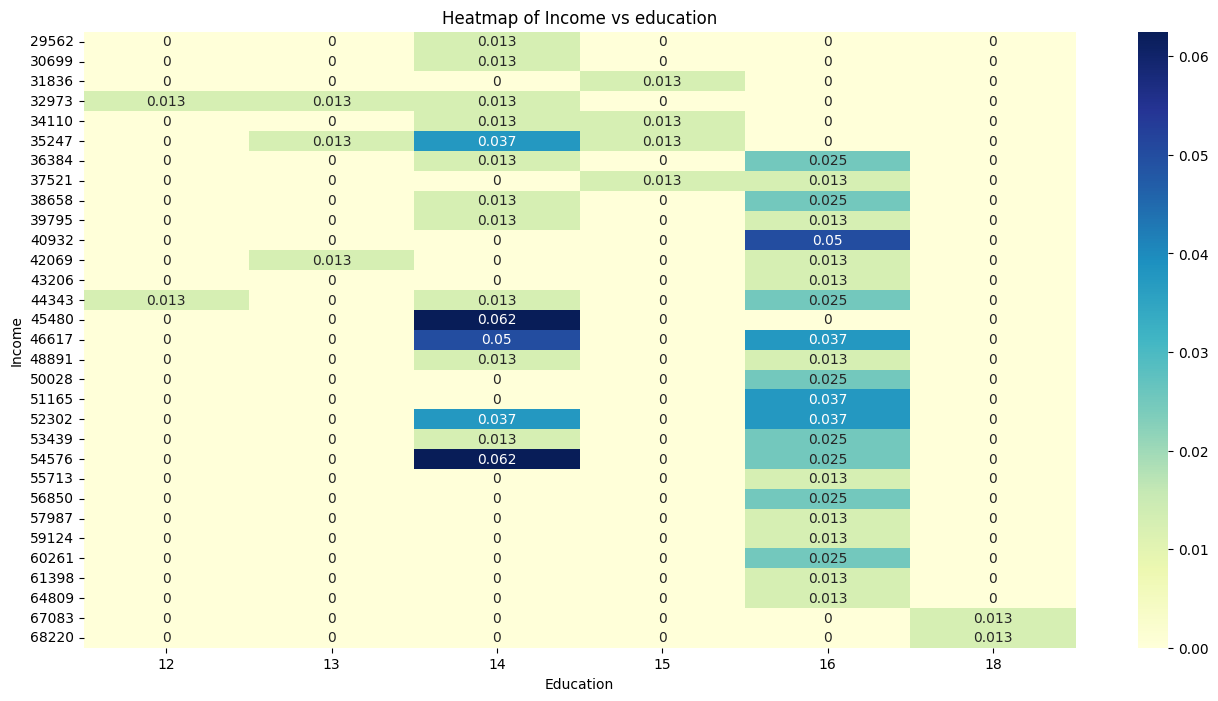

In [ ]:
plt.figure(figsize=(16, 8))
sns.heatmap(inc_edu, annot=True, cmap='YlGnBu')
plt.title("Heatmap of Income vs education")
plt.show()

In [ ]:
print("Probability of user with 14 years of education:", 30/80)
print("Probability of user with 16 years of education:", 39/80)

Probability of user with 14 years of education: 0.375
Probability of user with 16 years of education: 0.4875


In [ ]:
income_education = pd.crosstab(df_1["Income"], df_1["Education"])

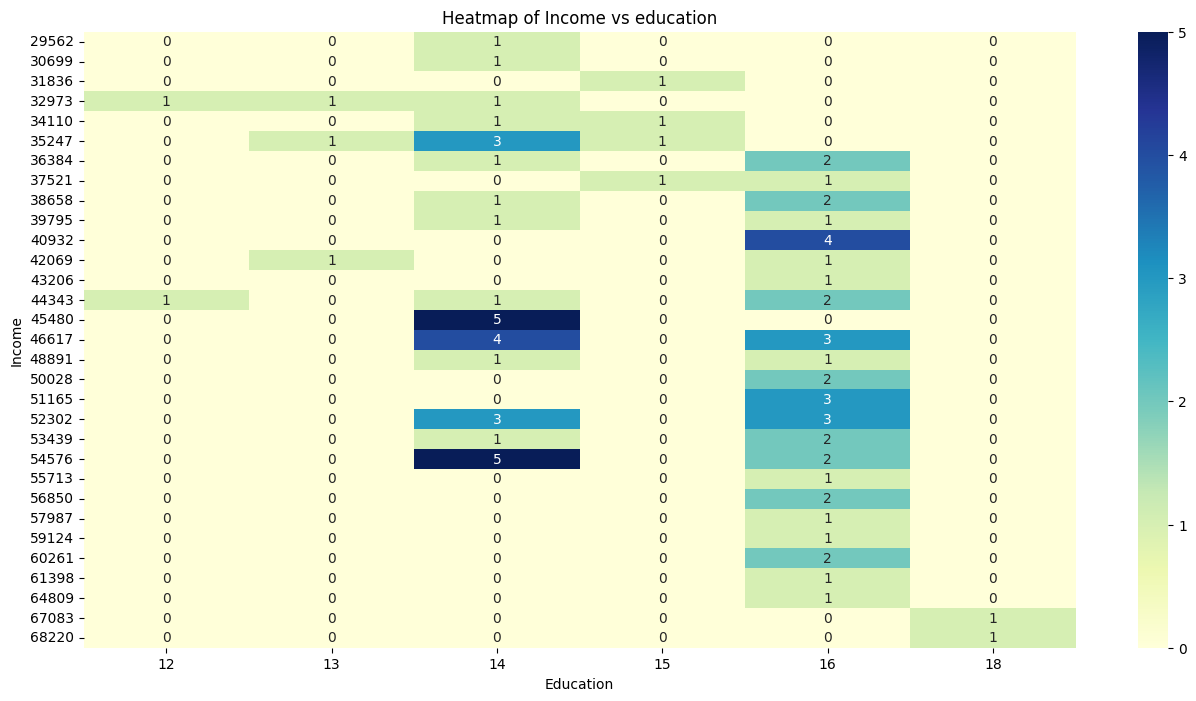

In [ ]:
plt.figure(figsize=(16, 8))
sns.heatmap(income_education, annot=True, cmap='YlGnBu')
plt.title("Heatmap of Income vs education")
plt.show()

In [ ]:
'''
Product KP481 level analysis

'''

'\nProduct KP481 level analysis\n\n'

In [ ]:
df_2 = data[data["Product"] == "KP481"]

In [ ]:
df_2.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
80,KP481,19,Male,14,Single,3,3,31836,64
81,KP481,20,Male,14,Single,2,3,32973,53
82,KP481,20,Female,14,Partnered,3,3,34110,106
83,KP481,20,Male,14,Single,3,3,38658,95
84,KP481,21,Female,14,Partnered,5,4,34110,212


In [ ]:
df_2["Gender"].value_counts()

Male      31
Female    29
Name: Gender, dtype: int64

In [ ]:
print("Probability of being and male :", round(31/60,2))
print("Probability of being and female :", round(29/60,2))

Probability of being and male : 0.52
Probability of being and female : 0.48


In [ ]:
df_2["Age"].mean()

28.9

In [ ]:
df_2["Income"].mean()

48973.65

In [ ]:
df_2["Fitness"].mean()

2.9

In [ ]:
df_2["Usage"].mean()

3.066666666666667

In [ ]:
df_2["Miles"].mean()

87.93333333333334

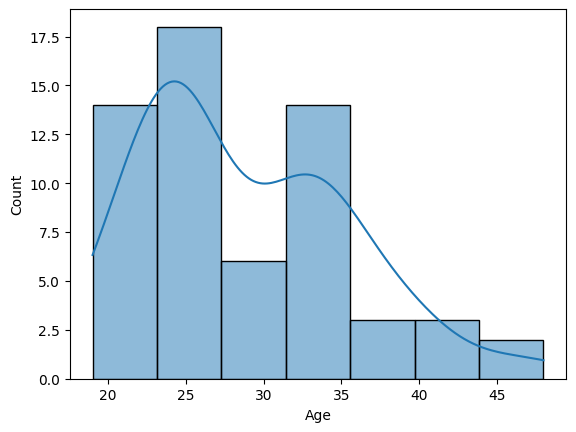

In [ ]:
sns.histplot(df_2, x = "Age", kde = True)
plt.show()

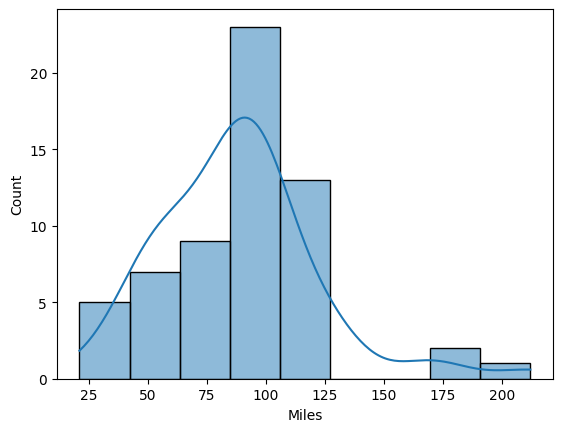

In [ ]:
sns.histplot(df_2, x = "Miles", kde = True)
plt.show()


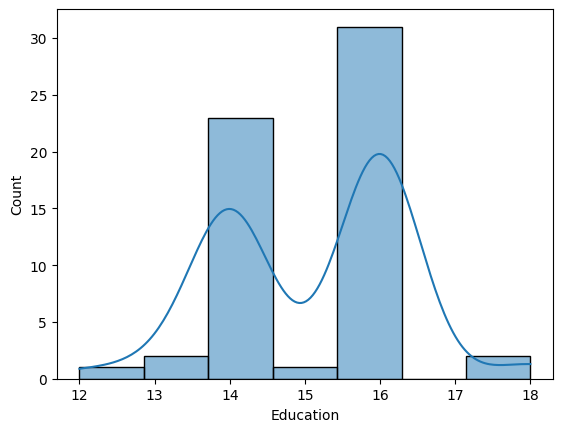

In [ ]:
sns.histplot(df_2, x = "Education", kde = True)
plt.show()

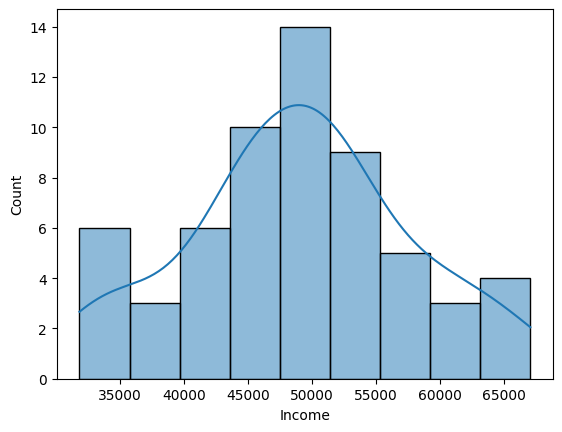

In [ ]:
sns.histplot(df_2, x = "Income", kde = True)
plt.show()

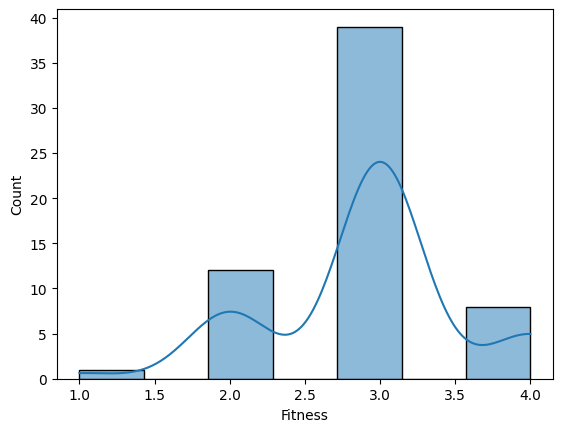

In [ ]:
sns.histplot(df_2, x = "Fitness", kde = True)
plt.show()

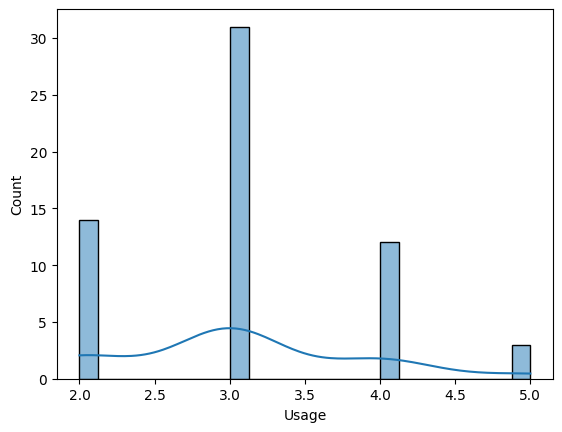

In [ ]:
sns.histplot(df_2, x = "Usage", kde = True)
plt.show()

In [ ]:
Usage_fitness_2 = pd.crosstab(df_2["Fitness"], df_2["Usage"], margins = True)
Usage_fitness_2

Usage,2,3,4,5,All
Fitness,,,,,
1,1,0,0,0,1
2,5,6,1,0,12
3,8,20,9,2,39
4,0,5,2,1,8
All,14,31,12,3,60


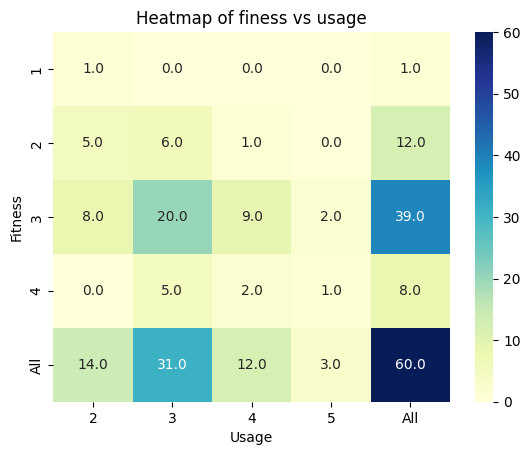

In [ ]:
sns.heatmap(Usage_fitness_2, annot=True, cmap='YlGnBu', fmt=".1f")
plt.title("Heatmap of finess vs usage")
plt.show()

In [ ]:
print("Probability of user beloinging to fitness level 1: ", 1/60)
print("Probability of user beloinging to fitness level 2: ", 12/60)
print("Probability of user beloinging to fitness level 3: ", 39/60)
print("Probability of user beloinging to fitness level 4: ", 8/60)
print("Probability of user beloinging to fitness level 5: ", 2/60)

Probability of user beloinging to fitness level 1:  0.016666666666666666
Probability of user beloinging to fitness level 2:  0.2
Probability of user beloinging to fitness level 3:  0.65
Probability of user beloinging to fitness level 4:  0.13333333333333333
Probability of user beloinging to fitness level 5:  0.03333333333333333


In [ ]:
print("Probability of user using the machine 2 times: ", 14/60)
print("Probability of user using the machine 3 times: ", 31/60)
print("Probability of user using the machine 4 times: ", 12/60)
print("Probability of user using the machine 5 times: ", 3/60)

Probability of user using the machine 2 times:  0.23333333333333334
Probability of user using the machine 3 times:  0.5166666666666667
Probability of user using the machine 4 times:  0.2
Probability of user using the machine 5 times:  0.05


In [ ]:
pd.crosstab(df_2["Fitness"], df_2["Usage"], normalize = True)

Usage,2,3,4,5
Fitness,,,,
1,0.016667,0.000000,0.000000,0.000000
2,0.083333,0.100000,0.016667,0.000000
3,0.133333,0.333333,0.150000,0.033333
4,0.000000,0.083333,0.033333,0.016667


In [ ]:
print("probability if usage of machine 3 times and fitness level 3 :", round(0.333333*0.65, 2))
print("probability if usage of machine 4 times and fitness level 3 :", round(0.150000*0.65, 2))
print("probability if usage of machine 2 times and fitness level 3 :", round(0.133333	*0.65, 2))
print("probability if usage of machine 5 times and fitness level 3 :", round(0.033333*0.65,2))

probability if usage of machine 3 times and fitness level 3 : 0.22
probability if usage of machine 4 times and fitness level 3 : 0.1
probability if usage of machine 2 times and fitness level 3 : 0.09
probability if usage of machine 5 times and fitness level 3 : 0.02


In [ ]:
pd.crosstab(df_2["Gender"], df_2["Usage"], normalize = True)

Usage,2,3,4,5
Gender,,,,
Female,0.116667,0.233333,0.083333,0.05
Male,0.116667,0.283333,0.116667,0.00


In [ ]:
print("Probability of being a man and usage 3:", 0.52*0.52)
print("Probability of being a woman and usage 3:", 0.48*0.52)

Probability of being a man and usage 3: 0.27040000000000003
Probability of being a woman and usage 3: 0.2496


In [ ]:
pd.crosstab( df_2["Education"], df_2["Income"], margins = True)

Income,31836,32973,34110,36384,38658,40932,43206,45480,46617,47754,...,54576,57987,59124,60261,61398,62535,64809,65220,67083,All
Education,,,,,,,,,,,,,,,,,,,,,
12,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2
14,1,1,2,1,2,2,3,5,0,1,...,0,1,0,0,0,0,0,0,0,23
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
16,0,0,1,0,0,0,1,4,0,0,...,1,2,2,1,1,1,2,0,0,31
18,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,2
All,1,2,3,1,2,2,4,9,1,2,...,1,3,2,1,1,1,2,1,1,60


In [ ]:
print("Probability of user with 14 years of education:", 23/60)
print("Probability of user with 16 years of education:", 31/60)

Probability of user with 14 years of education: 0.38333333333333336
Probability of user with 16 years of education: 0.5166666666666667


In [ ]:
inc_edu_2 = pd.crosstab(  df_2["Income"],df_2["Education"])
inc_edu_2

Education,12,13,14,15,16,18
Income,,,,,,
31836,0,0,1,0,0,0
32973,1,0,1,0,0,0
34110,0,0,2,0,1,0
36384,0,0,1,0,0,0
38658,0,0,2,0,0,0
40932,0,0,2,0,0,0
43206,0,0,3,0,1,0
45480,0,0,5,0,4,0
46617,0,1,0,0,0,0


In [ ]:
print("Probability of users belonging to income of [45k - 55k]:", 33/60)

Probability of users belonging to income of [45k - 55k]: 0.55


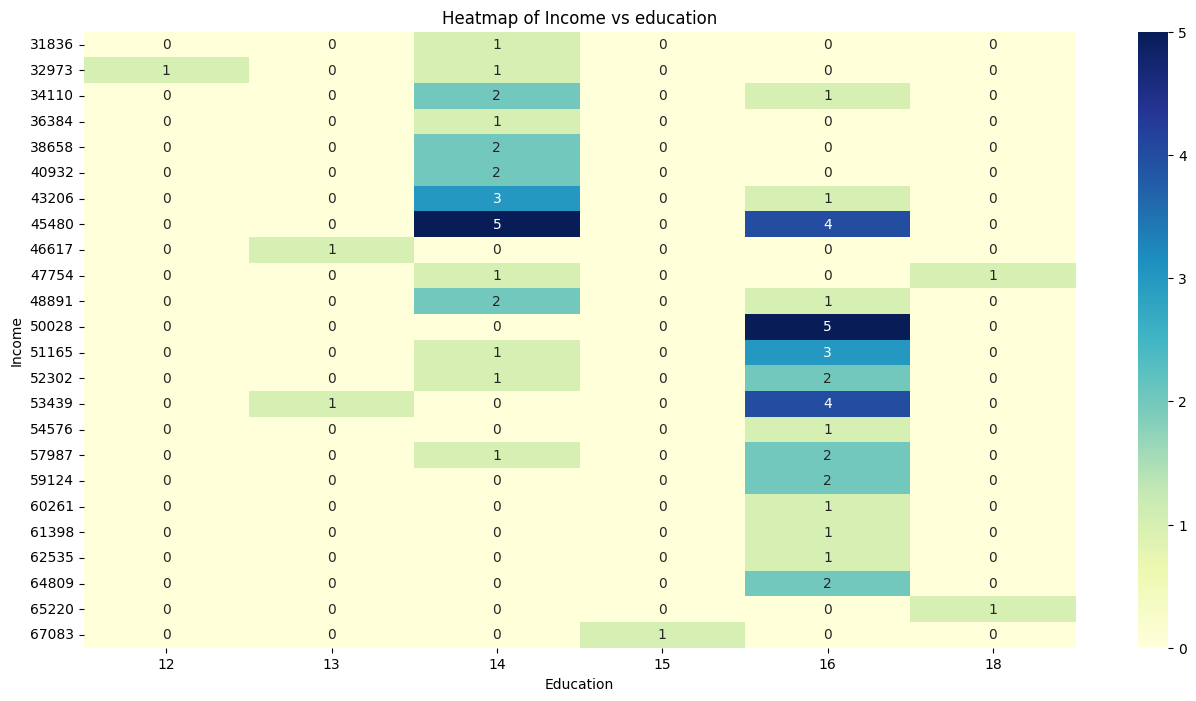

In [ ]:
plt.figure(figsize=(16, 8))
sns.heatmap(inc_edu_2, annot=True, cmap='YlGnBu')
plt.title("Heatmap of Income vs education")
plt.show()

In [ ]:
'''
Product KP781 level analysis

'''

In [ ]:
df_3 = data[data["Product"]=="KP781"]

In [ ]:
df_3.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
140,KP781,22,Male,14,Single,4,3,48658,106
141,KP781,22,Male,16,Single,3,5,54781,120
142,KP781,22,Male,18,Single,4,5,48556,200
143,KP781,23,Male,16,Single,4,5,58516,140
144,KP781,23,Female,18,Single,5,4,53536,100


In [ ]:
df_3.shape

(40, 9)

In [ ]:
df_3["Gender"].value_counts()

Male      33
Female     7
Name: Gender, dtype: int64

In [ ]:
print("Probability of being a male :", 33/40)
print("Probability of being a female :", 7/40)

Probability of being a male : 0.825
Probability of being a female : 0.175


In [ ]:
df_3.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,40.000000,40.000000,40.000000,40.000000,40.00000,40.000000
mean,29.100000,17.325000,4.775000,4.625000,75441.57500,166.900000
std,6.971738,1.639066,0.946993,0.667467,18505.83672,60.066544
min,22.000000,14.000000,3.000000,3.000000,48556.00000,80.000000
25%,24.750000,16.000000,4.000000,4.000000,58204.75000,120.000000
50%,27.000000,18.000000,5.000000,5.000000,76568.50000,160.000000
75%,30.250000,18.000000,5.000000,5.000000,90886.00000,200.000000
max,48.000000,21.000000,7.000000,5.000000,104581.00000,360.000000


In [ ]:
Usage_fitness_3 = pd.crosstab(df_3["Fitness"], df_3["Usage"], margins = True)
Usage_fitness_3

Usage,3,4,5,6,7,All
Fitness,,,,,,
3,0,4,0,0,0,4
4,0,2,4,1,0,7
5,1,12,8,6,2,29
All,1,18,12,7,2,40


In [ ]:

print("Probability of user belonging to fitness level 3: ", 4/40)
print("Probability of user belonging to fitness level 4: ", 7/40)
print("Probability of user belonging to fitness level 5: ", 29/40)


print("Probability of user using the machine 3 times: ", 1/40)
print("Probability of user using the machine 4 times: ", 18/40)
print("Probability of user using the machine 5 times: ", 12/40)
print("Probability of user using the machine 6 times: ", 7/40)
print("Probability of user using the machine 7 times: ", 2/40)

Probability of user belonging to fitness level 3:  0.1
Probability of user belonging to fitness level 4:  0.175
Probability of user belonging to fitness level 5:  0.725
Probability of user using the machine 3 times:  0.025
Probability of user using the machine 4 times:  0.45
Probability of user using the machine 5 times:  0.3
Probability of user using the machine 6 times:  0.175
Probability of user using the machine 7 times:  0.05


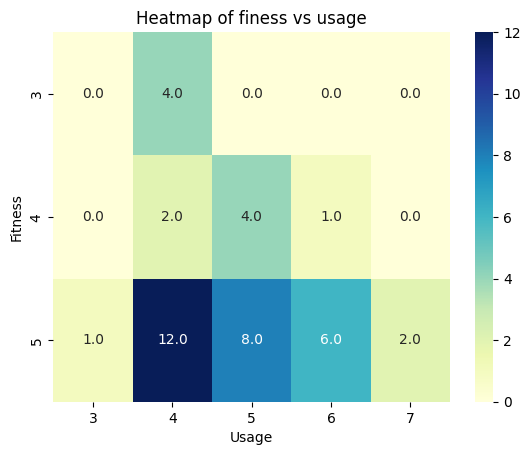

In [ ]:
sns.heatmap(Usage_fitness_3, annot=True, cmap='YlGnBu', fmt=".1f")
plt.title("Heatmap of finess vs usage")
plt.show()

In [ ]:
pd.crosstab(df_3["Fitness"], df_3["Usage"], normalize = True)

Usage,3,4,5,6,7
Fitness,,,,,
3,0.000,0.10,0.0,0.000,0.00
4,0.000,0.05,0.1,0.025,0.00
5,0.025,0.30,0.2,0.150,0.05


In [ ]:
print("probability if usage of machine 3 times and fitness level 5 :", round(0.025*0.725, 2))
print("probability if usage of machine 4 times and fitness level 5 :", round(0.30*0.725, 2))
print("probability if usage of machine 5 times and fitness level 5 :", round(0.2*0.725, 2))
print("probability if usage of machine 6 times and fitness level 5 :", round(0.150*0.725,2))
print("probability if usage of machine 7 times and fitness level 5 :", round(0.05*0.725,2))

probability if usage of machine 3 times and fitness level 5 : 0.02
probability if usage of machine 4 times and fitness level 5 : 0.22
probability if usage of machine 5 times and fitness level 5 : 0.14
probability if usage of machine 6 times and fitness level 5 : 0.11
probability if usage of machine 7 times and fitness level 5 : 0.04


In [ ]:
pd.crosstab(df_3["Gender"], df_3["Usage"], normalize = True)

Usage,3,4,5,6,7
Gender,,,,,
Female,0.000,0.05,0.075,0.050,0.00
Male,0.025,0.40,0.225,0.125,0.05


In [ ]:
print("Probability of being a man and usage 5:", 0.225*0.825)
print("Probability of being a man and usage 4:", 0.4*0.825)
print("Probability of being a woman and usage 5:", 0.075*0.175)

Probability of being a man and usage 5: 0.18562499999999998
Probability of being a man and usage 4: 0.33
Probability of being a woman and usage 5: 0.013125


In [ ]:
pd.crosstab( df_3["Education"], df_3["Income"], margins = True)

Income,48556,48658,49801,52290,52291,53536,54781,57271,58516,61006,...,88396,89641,90886,92131,95508,95866,99601,103336,104581,All
Education,,,,,,,,,,,,,,,,,,,,,
14,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
16,1,0,2,0,1,0,1,0,1,1,...,0,1,2,2,0,0,0,0,0,15
18,1,0,0,1,0,1,0,1,0,1,...,2,1,0,1,1,1,1,1,2,19
20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
21,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,3
All,2,1,2,1,1,1,1,1,1,2,...,2,2,3,3,1,1,1,1,2,40


In [ ]:
print("Probability of user with 16 years of education:", 15/40)
print("Probability of user with 18 years of education:", 19/40)

Probability of user with 16 years of education: 0.375
Probability of user with 18 years of education: 0.475


In [ ]:
inc_edu_3 = pd.crosstab(  df_3["Income"],df_3["Education"])
inc_edu_3

Education,14,16,18,20,21
Income,,,,,
48556,0,1,1,0,0
48658,1,0,0,0,0
49801,0,2,0,0,0
52290,0,0,1,0,0
52291,0,1,0,0,0
53536,0,0,1,0,0
54781,0,1,0,0,0
57271,0,0,1,0,0
58516,0,1,0,0,0


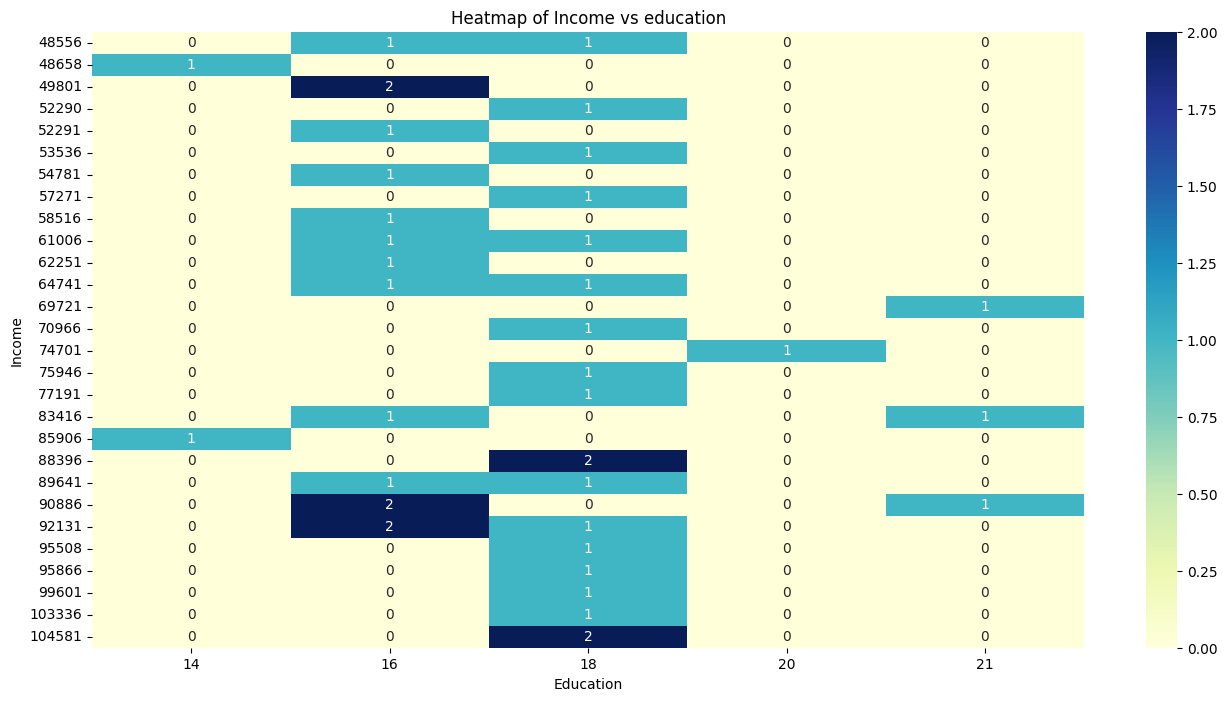

In [ ]:

plt.figure(figsize=(16, 8))
sns.heatmap(inc_edu_3, annot=True, cmap='YlGnBu')
plt.title("Heatmap of Income vs education")
plt.show()